The "Credit Card Fraud Detection" dataset is a real-world dataset that contains information about credit card transactions that occurred over a two-day period in September 2013. The dataset was collected and made available by the Machine Learning Group at the Université Libre de Bruxelles (ULB) in Belgium.

The dataset contains a total of 284,807 transactions, with 492 (0.17%) of them being fraudulent transactions. The remaining transactions are non-fraudulent. Each transaction is represented by 31 features, including the transaction amount, the time elapsed since the first transaction in the dataset, and 28 anonymized features obtained using Principal Component Analysis (PCA). The "Class" column indicates whether the transaction was fraudulent (Class=1) or not (Class=0).

The dataset is highly imbalanced, with a very small proportion of fraudulent transactions compared to non-fraudulent transactions. This makes it challenging to build accurate models that can detect fraudulent transactions while minimizing the number of false positives.

The dataset is commonly used as a benchmark dataset for fraud detection in credit card transactions. Many researchers and data scientists have used this dataset to develop and test various machine learning algorithms and techniques for detecting fraudulent transactions.

In [45]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
# Load the dataset
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# Display basic statistics of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [39]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [40]:
# check duplicates
df.duplicated().sum()

1081

In [41]:
# drop duplicates
df = df.drop_duplicates()

In [42]:
# Check for negative values in the 'Amount' feature
df[df['Amount'] < 0].shape[0]

0

In [43]:
#data types
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [44]:
# Check for incorrect categories in the 'Class' feature
df[(df['Class'] != 0) & (df['Class'] != 1)].shape[0]

0

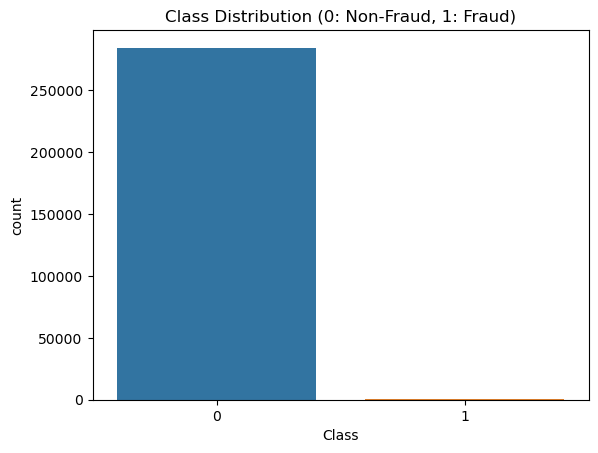

In [25]:
# Visualize the class imbalance
sns.countplot(data= df, x = 'Class')
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

The dataset is highly imbalanced, with a small proportion of fraudulent transactions. 

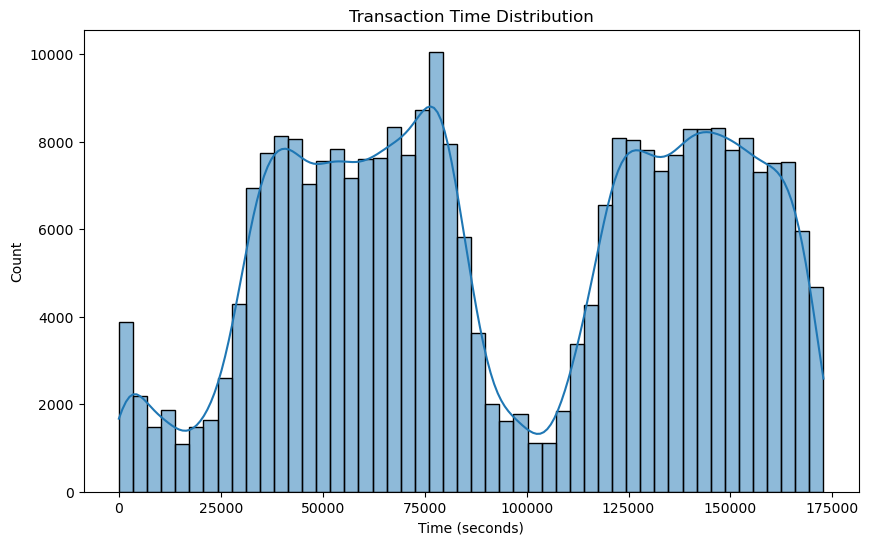

In [26]:
# Visualize the distribution of the 'Time' feature
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Time', bins = 50, kde = True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.show()

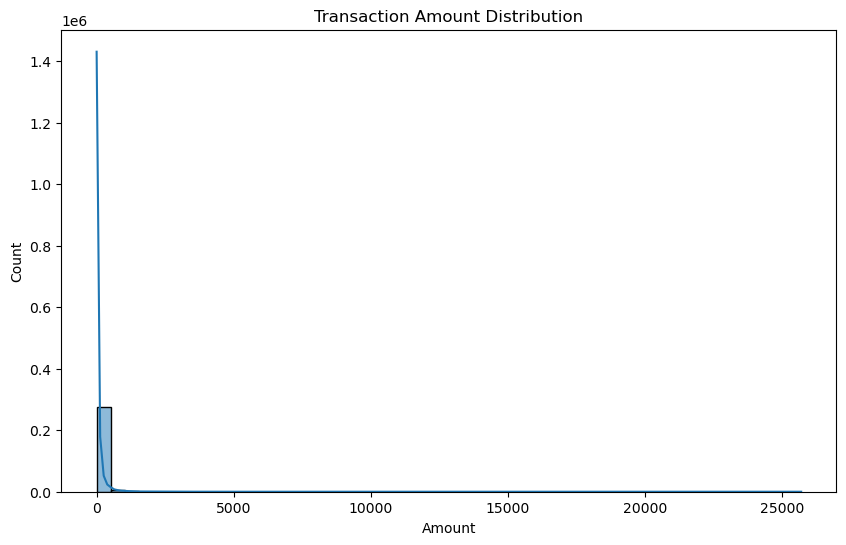

In [27]:
# Visualize the distribution of the 'Amount' feature
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Amount', bins = 50, kde = True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.show()

The 'Time' and 'Amount' features have different distributions, and their relationship with fraudulent transactions needs to be further investigated. Feature scaling and transformation may be required to improve model performance.

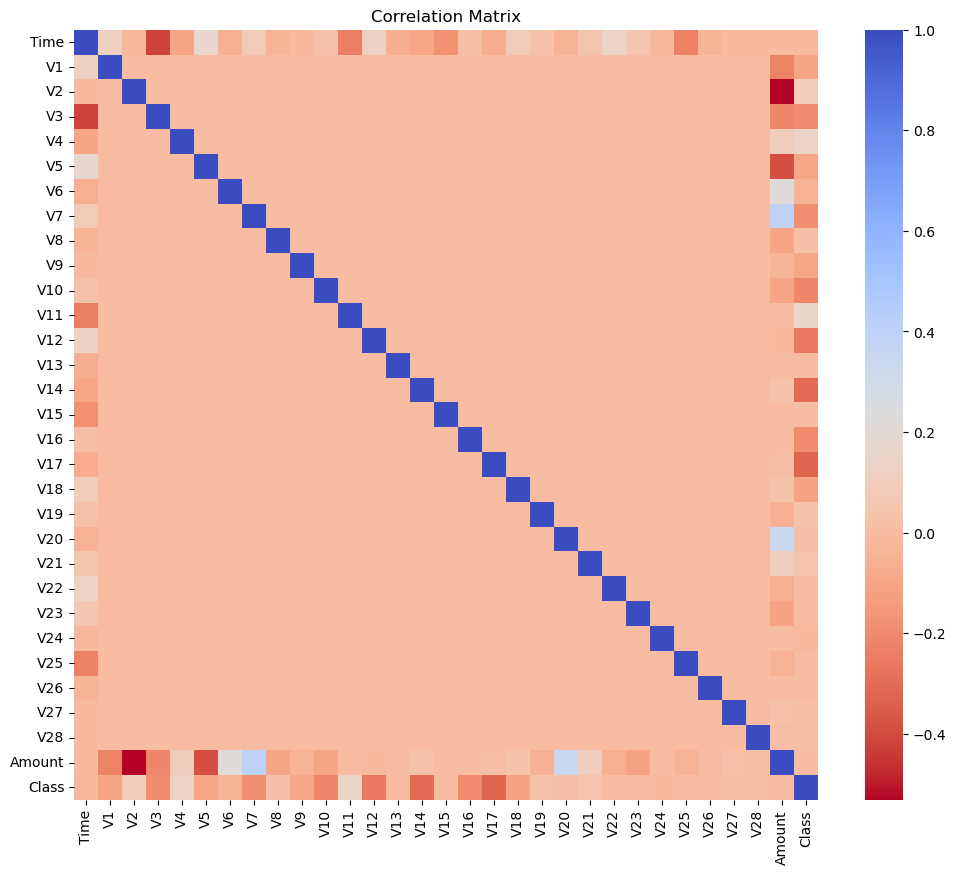

In [28]:
# Visualize the correlation between features
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws = {'size': 20})
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Initialize the scalers
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

# Scale the 'Time' feature using StandardScaler (transforms data to have zero mean and unit variance)
df['Time_scaled'] = std_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Scale the 'Amount' feature using RobustScaler (less sensitive to outliers)
df['Amount_scaled'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' features
df.drop(['Time', 'Amount'], axis=1, inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_scaled,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,0.670579


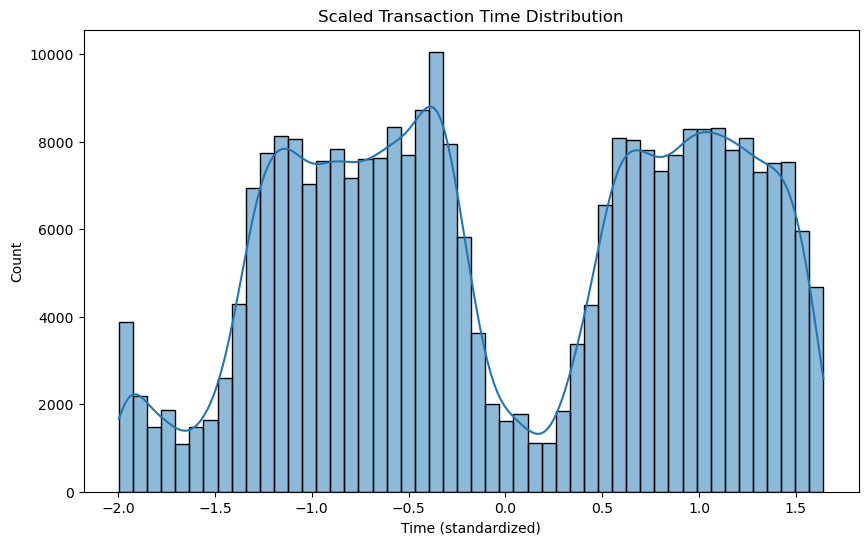

In [30]:
# Visualize the distribution of the scaled 'Time' feature
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Time_scaled', bins = 50, kde = True)
plt.title('Scaled Transaction Time Distribution')
plt.xlabel('Time (standardized)')
plt.show()

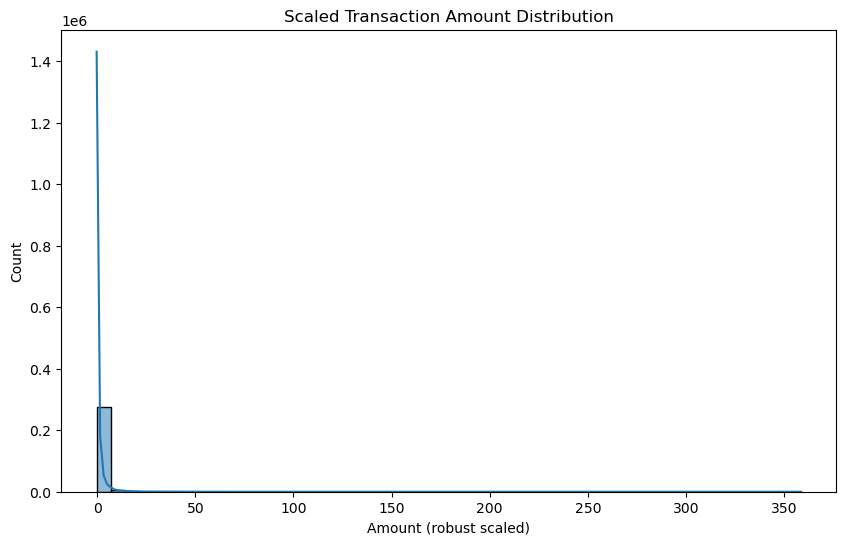

In [31]:
# Visualize the distribution of the scaled 'Amount' feature
plt.figure(figsize = (10, 6))
sns.histplot(data = df, x = 'Amount_scaled', bins = 50, kde = True)
plt.title('Scaled Transaction Amount Distribution')
plt.xlabel('Amount (robust scaled)')
plt.show()

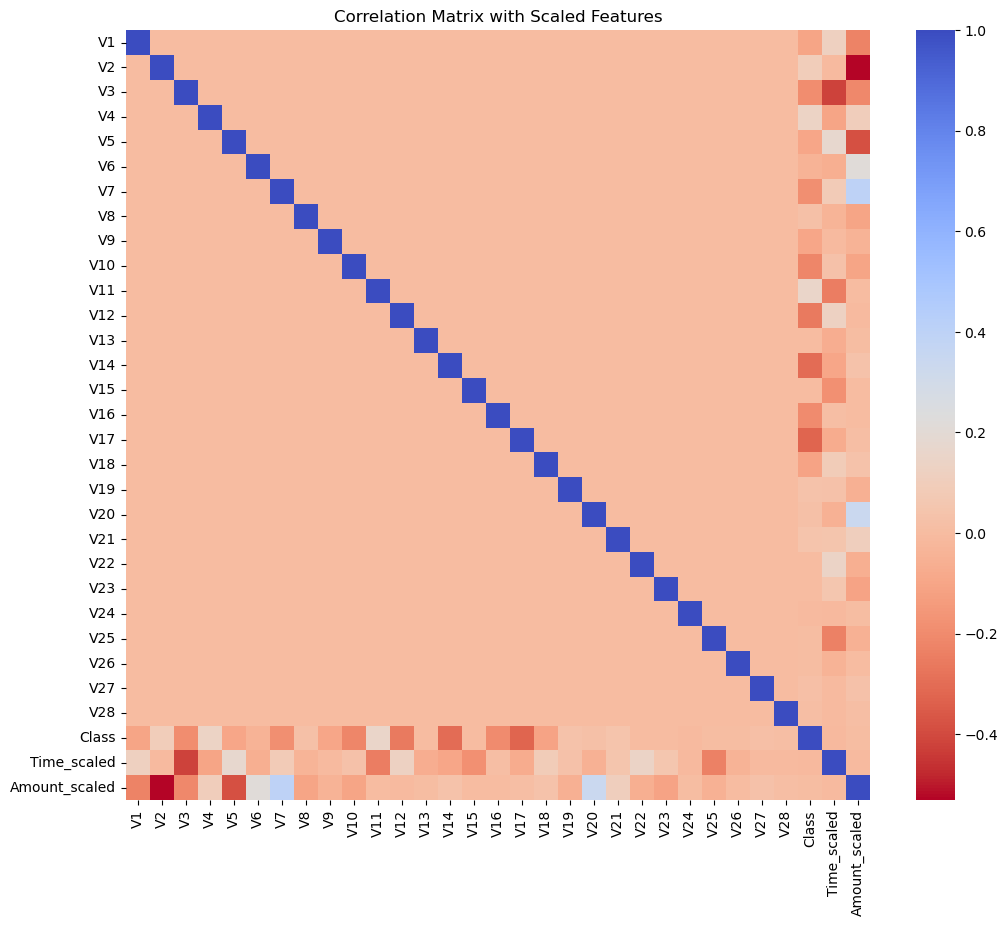

In [32]:
# Visualize the correlation between features
corr = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws={'size': 20})
plt.title('Correlation Matrix with Scaled Features')
plt.show()


After scaling and transforming the 'Time' and 'Amount' features, the effects of these changes can be observed on the feature distributions and their correlations.

In [46]:
# Define the features (X) and the target variable (y)
X = df.drop('Class', axis = 1)
y = df['Class']

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)